#### Cultural Data Science 
# Assignment 2 



### Part I.

In [1]:
# Lets load our libraries first 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lets Load our data 
data1 = pd.read_csv('../data/divorce_margarine.csv')

In [4]:
# Lets explore the data 
data1.head(5)

,Unnamed: 0,divorce_rate_maine,margarine_consumption_per_capita,year
0,1,5.0,8.2,2000
1,2,4.7,7.0,2001
2,3,4.6,6.5,2002
3,4,4.4,5.3,2003
4,5,4.3,5.2,2004


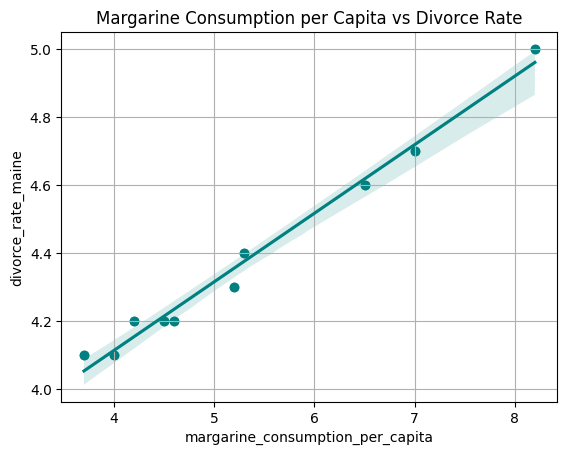

In [19]:
# Lets plot the divorce rates against the margarine consumption 
plt.scatter(data1['margarine_consumption_per_capita'], data1['divorce_rate_maine'], color='teal')
# Lets add labels to x and y axis
plt.xlabel('Margarine Consumption per Capita')
plt.ylabel('Divorce Rate')
# Add a grid to the plot
plt.grid()
# add a trendline to the plot
sns.regplot(x=data1['margarine_consumption_per_capita'], y=data1['divorce_rate_maine'], data=data1, color='teal')
# Lets add a title to the plot
plt.title('Margarine Consumption per Capita vs Divorce Rate')

# save this plot as a variable p 
p = plt.show()


In [6]:
# Lets calculate the correlation between the two variables
correlation = data1['margarine_consumption_per_capita'].corr(data1['divorce_rate_maine'])
print(correlation)

0.9925584582238187


<Axes: >

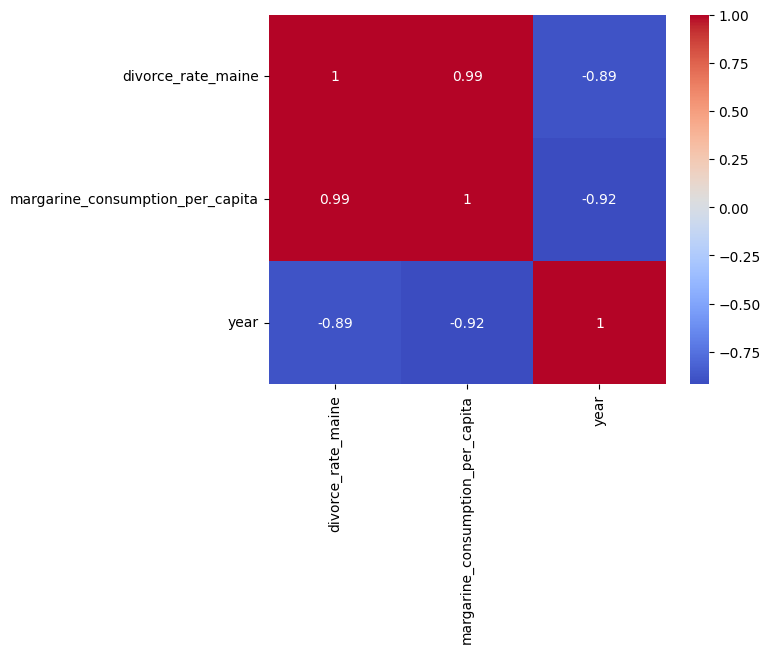

In [ ]:
# we can also visualize a correlation matrix for all the variables in the dataset
# at first lets remove the unnamed column
data1 = data1.drop('Unnamed: 0', axis=1)
# and visualize the correlation matrix
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')


### Part II.

A.  
    Load the ‘GSSvocab’dataset from the ‘car’ package. 

    This dataset contains people’s scores on an English vocabulary test and includes demographic information.
B.
    Filter for the year 1978 and remove rows with missing values (the function na.exclude()is one way to do this–check out the documentation!).
C.
    Is a person’s  score on the vocabulary test  (‘vocab’) significantly impacted by their level  of education (‘educ’)?
    Visualize the relationship in a plot and build a model. Briefly explain the results.
D.
    Whether a person is the native of an English-speaking country(‘nativeBorn’) could potentially have an impact on the size of their vocabulary. Visualize the relationship and add the predictor to the model. Briefly explain the results.
E . 
    Does  a  person’s  level  of  education  depend  on  whether they  are  a  native  of  the  country?
    Visualize the relationship. Do you think it makes sense to add the relationship as an interaction term?
    Try creating the model and briefly explain the results. 
    Which model performs best? 

When creating plots, try to play around with the options of ggplot2–add titles and axis labels, and consider using colours.

In [ ]:
# A.

# Lets load the second dataset 
data2 = pd.read_csv('../data/dss_vocab.csv')

In [10]:
# remove the column Unnamed: 0
data2 = data2.drop('Unnamed: 0', axis=1)

In [ ]:
# B.

# now take only the rows with year 1978
data2_1978 = data2[data2['year'] == 1978]
# and remove the rows with missing values
data2_1978 = data2_1978.dropna()

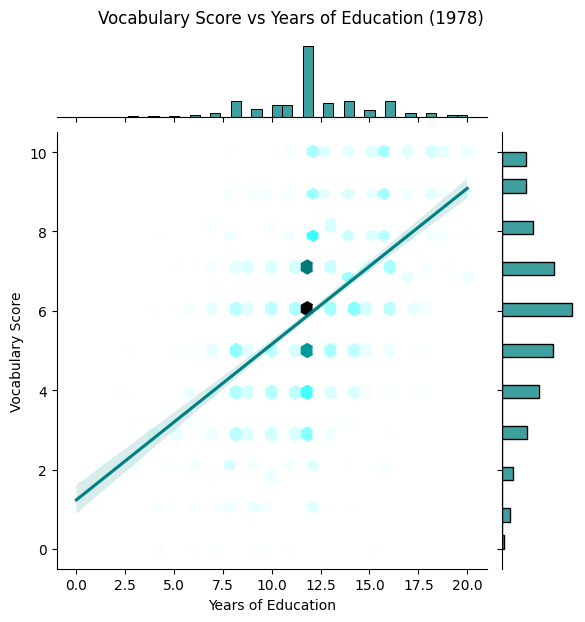

In [ ]:
# C.

# First visualize this as a histogram on x axis and y axis 
g = sns.jointplot(x=data2_1978['educ'], y=data2_1978['vocab'], kind='hex', color='teal')

# add a regression line on top
sns.regplot(x=data2_1978['educ'], y=data2_1978['vocab'], ax=g.ax_joint, scatter=False, color='teal')

# and some labels
g.set_axis_labels('Years of Education', 'Vocabulary Score')
g.figure.suptitle('Vocabulary Score vs Years of Education (1978)', y=1.03)

plt.show()

In [44]:
import statsmodels.api as sm

# Lets fit the general linear model from statsmodels
X = data2_1978['educ']
y = data2_1978['vocab']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


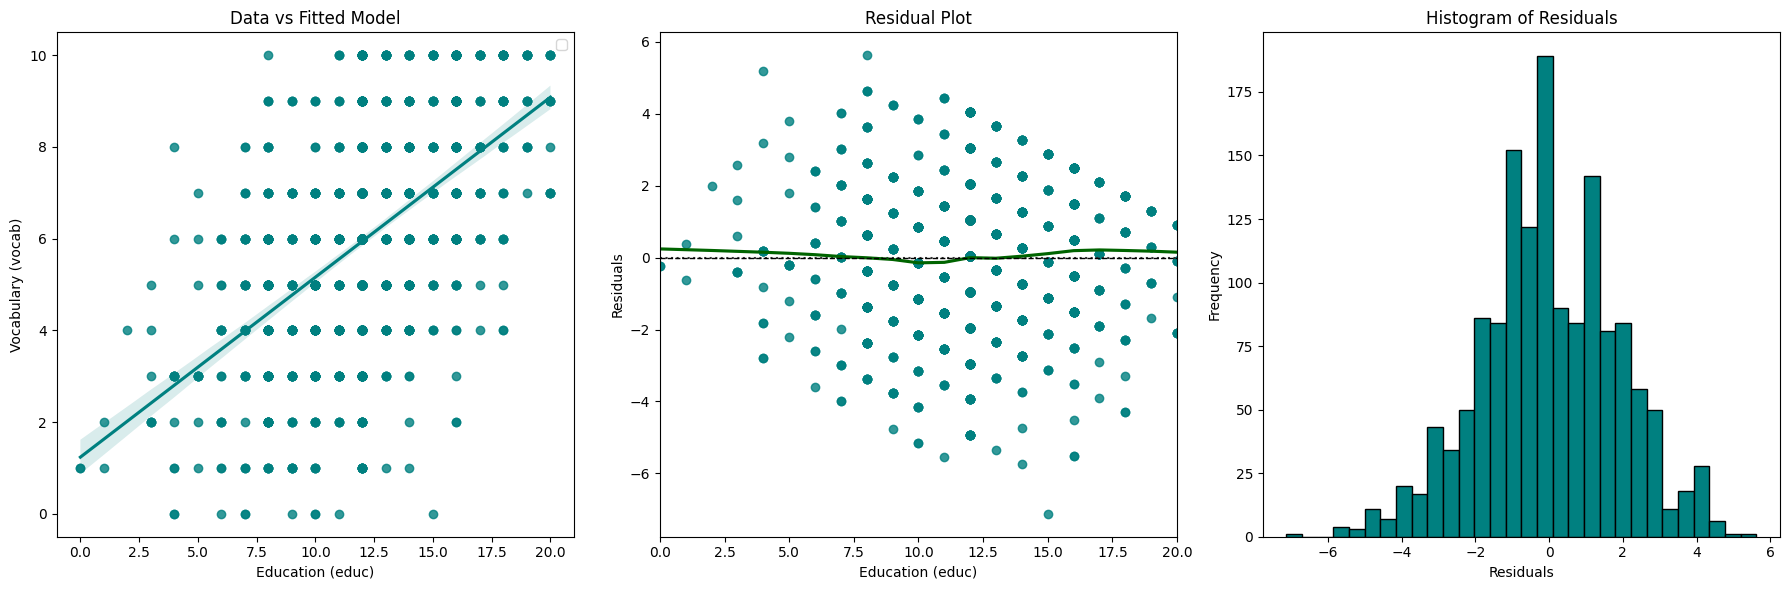

In [45]:
# Let's do a quick diagnostics of the model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
residuals = model.resid

# 1. Scatter Plot with Regression Line
sns.regplot(x=data2_1978['educ'], y=data2_1978['vocab'], ax=axes[0], color='teal')
axes[0].legend()
axes[0].set_title('Data vs Fitted Model')
axes[0].set_xlabel('Education (educ)')
axes[0].set_ylabel('Vocabulary (vocab)')

# 2. Residual Plot
sns.residplot(x=data2_1978['educ'], y=residuals, lowess=True, line_kws={'color': 'darkgreen'}, ax=axes[1], color='teal')
axes[1].axhline(0, linestyle='--', color='black', linewidth=1)
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Education (educ)')
axes[1].set_ylabel('Residuals')

# 3. Histogram of Residuals
axes[2].hist(residuals, bins=30, edgecolor='black', color='teal')
axes[2].set_title('Histogram of Residuals')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Lets check the summary of the model
model.summary()


Brief explanation of the results:
- The results of the fitted OLS regression model suggest that education is a significant predictor of vocabulary size (b=0.3925, p<.001, t=24.443). 
- The estimated R2  of 0.288 suggests low to moderate explanatory power of around 28.8%.
- After running a quick inspection of the residuals, the residuals are approximately normally distributed without significant skewness or kurtosis, with no autocorrelation.

Whether a person is the native of an English-speaking country(‘nativeBorn’) could potentially have an impact on the size of their vocabulary. Visualize the relationship and add the predictor to the model. Briefly explain the results.

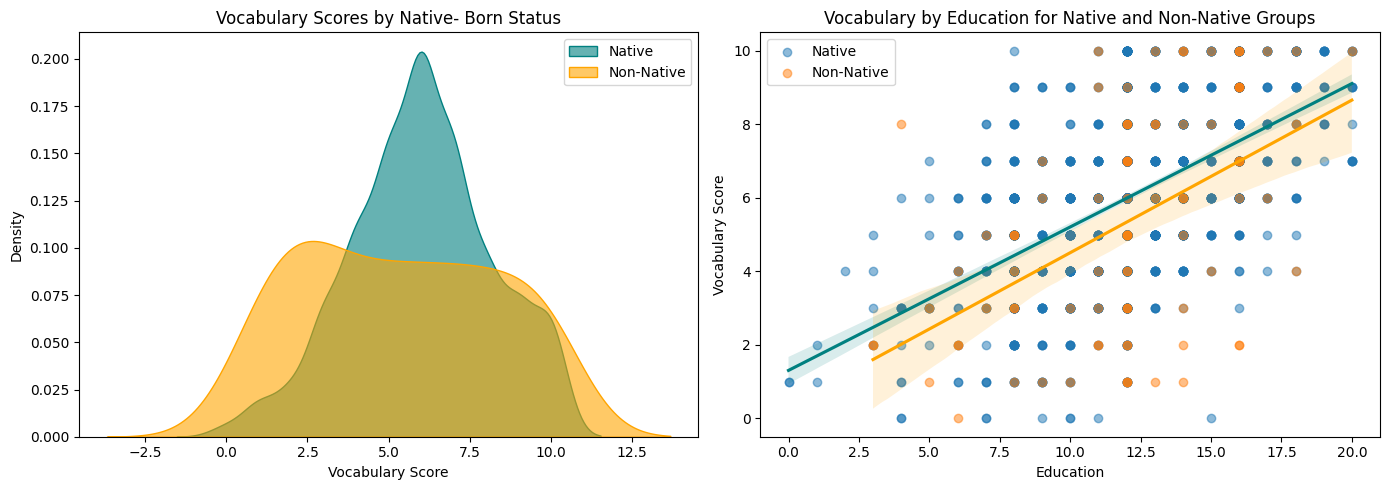

In [58]:
# D.
# We can for example begin by visualizing the distributions of vocabulary for native and non-native speakers
vocab_nativeBorn_yes = data2_1978[data2_1978['nativeBorn'] == 'yes']['vocab']
vocab_nativeBorn_no = data2_1978[data2_1978['nativeBorn'] == 'no']['vocab']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Density Plot
sns.kdeplot(vocab_nativeBorn_yes, label='Native', fill=True, color='teal', alpha=0.6, ax=axes[0])
sns.kdeplot(vocab_nativeBorn_no, label='Non-Native', fill=True, color='orange', alpha=0.6, ax=axes[0])

axes[0].set_xlabel('Vocabulary Score')
axes[0].set_ylabel('Density')
axes[0].set_title('Vocabulary Scores by Native- Born Status')
axes[0].legend()

# 2. Scatter Plot with Regression Lines
sns.regplot(
    x=data2_1978[data2_1978['nativeBorn'] == 'yes']['educ'],
    y=data2_1978[data2_1978['nativeBorn'] == 'yes']['vocab'],
    label='Native',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'teal'},
    ax=axes[1]
)
sns.regplot(
    x=data2_1978[data2_1978['nativeBorn'] == 'no']['educ'],
    y=data2_1978[data2_1978['nativeBorn'] == 'no']['vocab'],
    label='Non-Native',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'orange'},
    ax=axes[1]
)

axes[1].set_xlabel('Education')
axes[1].set_ylabel('Vocabulary Score')
axes[1].set_title('Vocabulary by Education for Native and Non-Native Groups')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Now lets extend our previous model to include the nativeBorn variable
X = data2_1978[['educ', 'nativeBorn']]
X = pd.get_dummies(X, drop_first=True)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Lets fit the general linear model from statsmodels
X = data2_1978['educ']
y = data2_1978['vocab']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()